In [ ]:
# Data Manipulation and Numerics
import pandas as pd
import numpy as np
import warnings

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Machine Learning - Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder


# Machine Learning - Feature Selection
from sklearn.feature_selection import SelectKBest, f_classif

# Machine Learning - Modeling
from sklearn.linear_model import LogisticRegression

# Machine Learning - Evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Display settings & Warnings
pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)
warnings.filterwarnings('ignore', category=FutureWarning) # Ignore specific FutureWarnings from sklearn/pandas
warnings.filterwarnings('ignore', category=UserWarning) # Ignore specific UserWarnings (e.g., convergence)

In [2]:
#Loading
df = pd.read_csv("Meteorite_landings/meteorite-landings.csv")

In [3]:
#Basic inspection
print(df.head())
print(df.info())

       name   id nametype     recclass      mass  fall    year    reclat  \
0    Aachen    1    Valid           L5      21.0  Fell  1880.0  50.77500   
1    Aarhus    2    Valid           H6     720.0  Fell  1951.0  56.18333   
2      Abee    6    Valid          EH4  107000.0  Fell  1952.0  54.21667   
3  Acapulco   10    Valid  Acapulcoite    1914.0  Fell  1976.0  16.88333   
4   Achiras  370    Valid           L6     780.0  Fell  1902.0 -33.16667   

     reclong               GeoLocation  
0    6.08333     (50.775000, 6.083330)  
1   10.23333    (56.183330, 10.233330)  
2 -113.00000  (54.216670, -113.000000)  
3  -99.90000   (16.883330, -99.900000)  
4  -64.95000  (-33.166670, -64.950000)  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         45716 non-null  object 
 1   id           45716 non-null  int64  
 2   nametype     45

In [4]:
#Shape
print(df.shape)


(45716, 10)


In [5]:
df.dtypes

name            object
id               int64
nametype        object
recclass        object
mass           float64
fall            object
year           float64
reclat         float64
reclong        float64
GeoLocation     object
dtype: object

In [6]:
print(df.describe())

                 id          mass          year        reclat       reclong
count  45716.000000  4.558500e+04  45428.000000  38401.000000  38401.000000
mean   26889.735104  1.327808e+04   1991.772189    -39.122580     61.074319
std    16860.683030  5.749889e+05     27.181247     46.378511     80.647298
min        1.000000  0.000000e+00    301.000000    -87.366670   -165.433330
25%    12688.750000  7.200000e+00   1987.000000    -76.714240      0.000000
50%    24261.500000  3.260000e+01   1998.000000    -71.500000     35.666670
75%    40656.750000  2.026000e+02   2003.000000      0.000000    157.166670
max    57458.000000  6.000000e+07   2501.000000     81.166670    354.473330


In [7]:
print(df.columns.tolist())

['name', 'id', 'nametype', 'recclass', 'mass', 'fall', 'year', 'reclat', 'reclong', 'GeoLocation']


In [8]:
print(df.isnull().sum())

df = df.dropna(subset=['mass',])

median_year = df['year'].median()
df['year'] = df['year'].fillna(median_year)

name              0
id                0
nametype          0
recclass          0
mass            131
fall              0
year            288
reclat         7315
reclong        7315
GeoLocation    7315
dtype: int64


In [9]:
# Convert 'year' to integer
df['year'] = df['year'].astype(int)

In [10]:
# Duplicate rows can lead to biased results in analysis or modeling
df.drop_duplicates(inplace=True)
print("\nRemoved duplicates, if any. New Shape:", df.shape)


Removed duplicates, if any. New Shape: (45585, 10)


In [11]:
df = df.dropna(subset=['reclat', 'reclong'])
print(df.isnull().sum())

name           0
id             0
nametype       0
recclass       0
mass           0
fall           0
year           0
reclat         0
reclong        0
GeoLocation    0
dtype: int64


In [12]:
earliest_year = df['year'].max()
oldest_year = df['year'].min()

print(earliest_year)
print(oldest_year)

2101
601


In [13]:
print(df[df['year'] == 2101])
print(df[df['year'] == 601])


                        name     id nametype recclass  mass   fall  year  \
30679  Northwest Africa 7701  57150    Valid      CK6  55.0  Found  2101   

       reclat  reclong           GeoLocation  
30679     0.0      0.0  (0.000000, 0.000000)  
                  name     id nametype recclass   mass   fall  year    reclat  \
38301  Wietrzno-Bobrka  24259    Valid     Iron  376.0  Found   601  49.41667   

       reclong             GeoLocation  
38301     21.7  (49.416670, 21.700000)  


In [14]:
print("MEteorite from 1900 to 2020")
filtered_years = df[(df['year'] >= 1900) & (df['year'] <= 2025)]

# Filter for rows where 'fall' is 'Fell'
fell_stones = filtered_years[filtered_years['fall'] == 'Fell']
print(fell_stones.head())

print("\nInfo of stone fell fron 1900 to 2020")
print(fell_stones.info())



# Assign the filtered DataFrame to a new variable
years_1900_to_2025 = filtered_years
# Now you can work with 'years_1900_to_2020'
print(years_1900_to_2025.head())  # See the first few rows


MEteorite from 1900 to 2020
       name   id nametype     recclass      mass  fall  year    reclat  \
1    Aarhus    2    Valid           H6     720.0  Fell  1951  56.18333   
2      Abee    6    Valid          EH4  107000.0  Fell  1952  54.21667   
3  Acapulco   10    Valid  Acapulcoite    1914.0  Fell  1976  16.88333   
4   Achiras  370    Valid           L6     780.0  Fell  1902 -33.16667   
5  Adhi Kot  379    Valid          EH4    4239.0  Fell  1919  32.10000   

     reclong               GeoLocation  
1   10.23333    (56.183330, 10.233330)  
2 -113.00000  (54.216670, -113.000000)  
3  -99.90000   (16.883330, -99.900000)  
4  -64.95000  (-33.166670, -64.950000)  
5   71.80000    (32.100000, 71.800000)  

Info of stone fell fron 1900 to 2020
<class 'pandas.core.frame.DataFrame'>
Index: 682 entries, 1 to 1107
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         682 non-null    object 
 1   id         

In [15]:
print(years_1900_to_2025.info())

<class 'pandas.core.frame.DataFrame'>
Index: 37574 entries, 1 to 45715
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         37574 non-null  object 
 1   id           37574 non-null  int64  
 2   nametype     37574 non-null  object 
 3   recclass     37574 non-null  object 
 4   mass         37574 non-null  float64
 5   fall         37574 non-null  object 
 6   year         37574 non-null  int64  
 7   reclat       37574 non-null  float64
 8   reclong      37574 non-null  float64
 9   GeoLocation  37574 non-null  object 
dtypes: float64(3), int64(2), object(5)
memory usage: 3.2+ MB
None


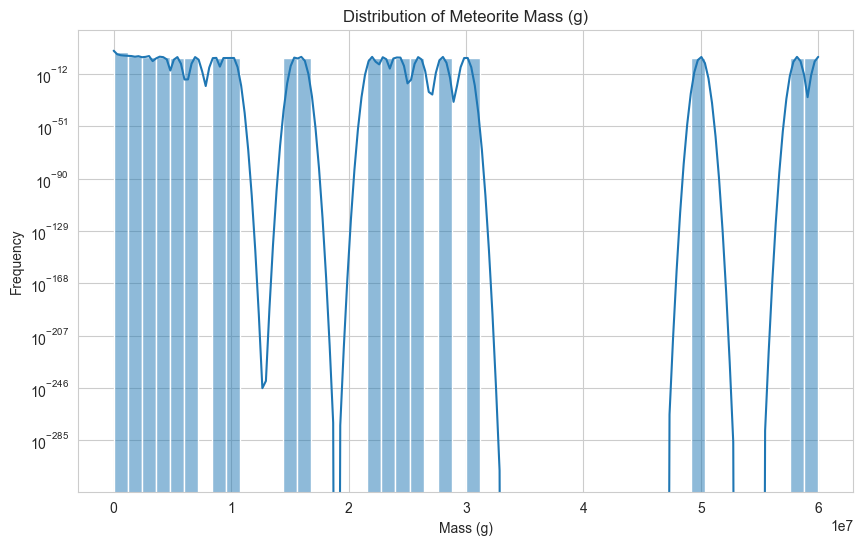

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(df['mass'], bins=50, kde=True)
plt.title('Distribution of Meteorite Mass (g)')
plt.xlabel('Mass (g)')
plt.ylabel('Frequency')
plt.yscale('log') #use log scale because of outliers.
plt.show()

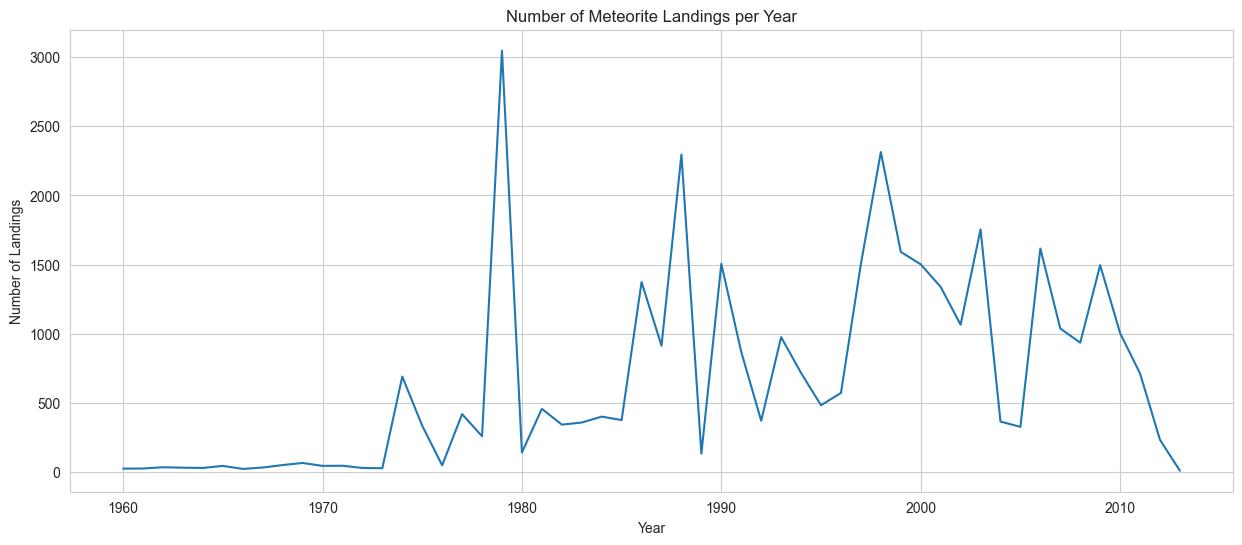

In [17]:
df_filtered = df[(df['year'] >= 1960) & (df['year'] <= 2025)]

# Calculate meteorite counts per year from the filtered DataFrame
meteorites_per_year = df_filtered['year'].value_counts().sort_index()

plt.figure(figsize=(15, 6))
sns.lineplot(x=meteorites_per_year.index, y=meteorites_per_year.values)
plt.title('Number of Meteorite Landings per Year')
plt.xlabel('Year')
plt.ylabel('Number of Landings')
plt.show()

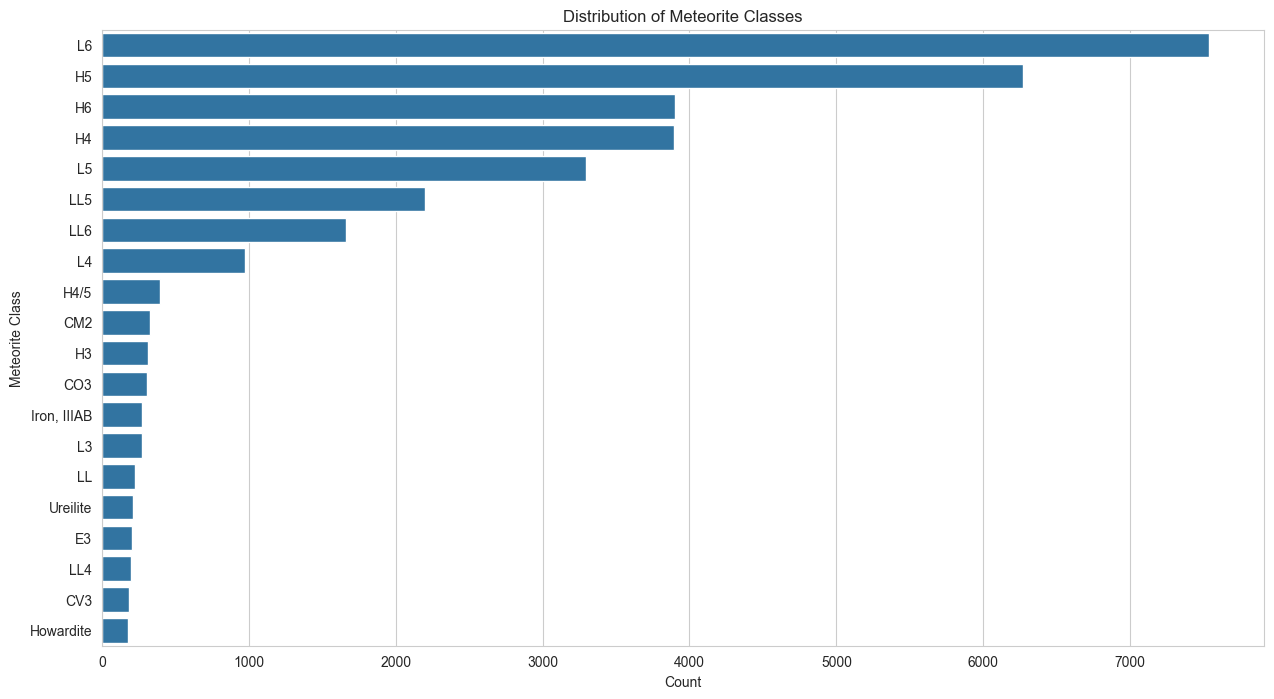

In [18]:
plt.figure(figsize=(15, 8))
sns.countplot(y='recclass', data=df, order=df['recclass'].value_counts().index[:20]) #only show the top 20 classes.
plt.title('Distribution of Meteorite Classes')
plt.xlabel('Count')
plt.ylabel('Meteorite Class')
plt.show()

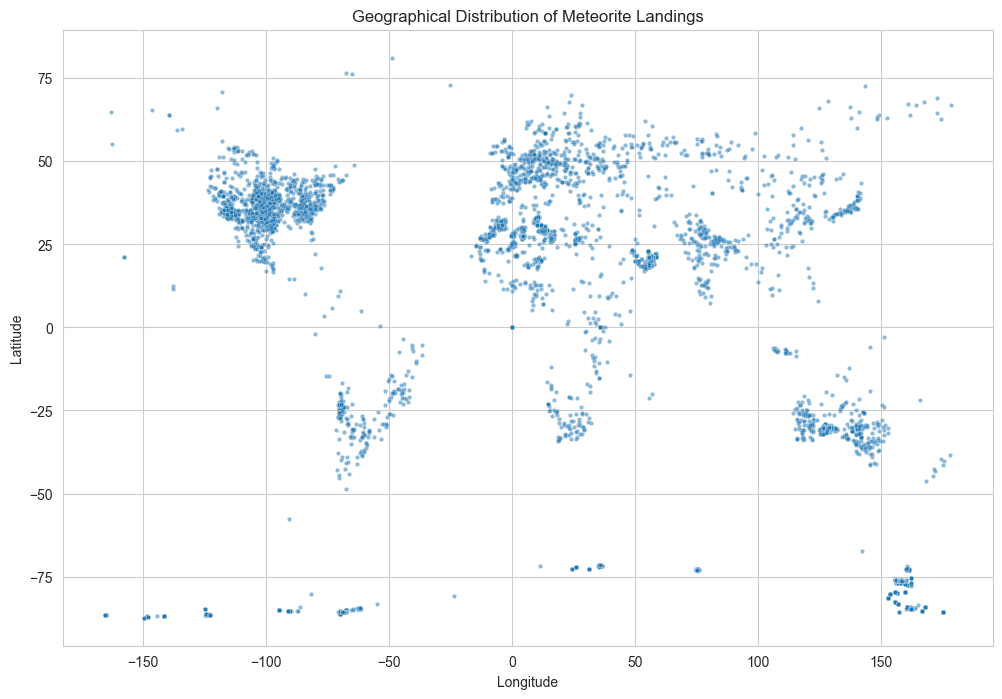

In [19]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='reclong', y='reclat', data=df, alpha=0.5, s=10)
plt.title('Geographical Distribution of Meteorite Landings')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

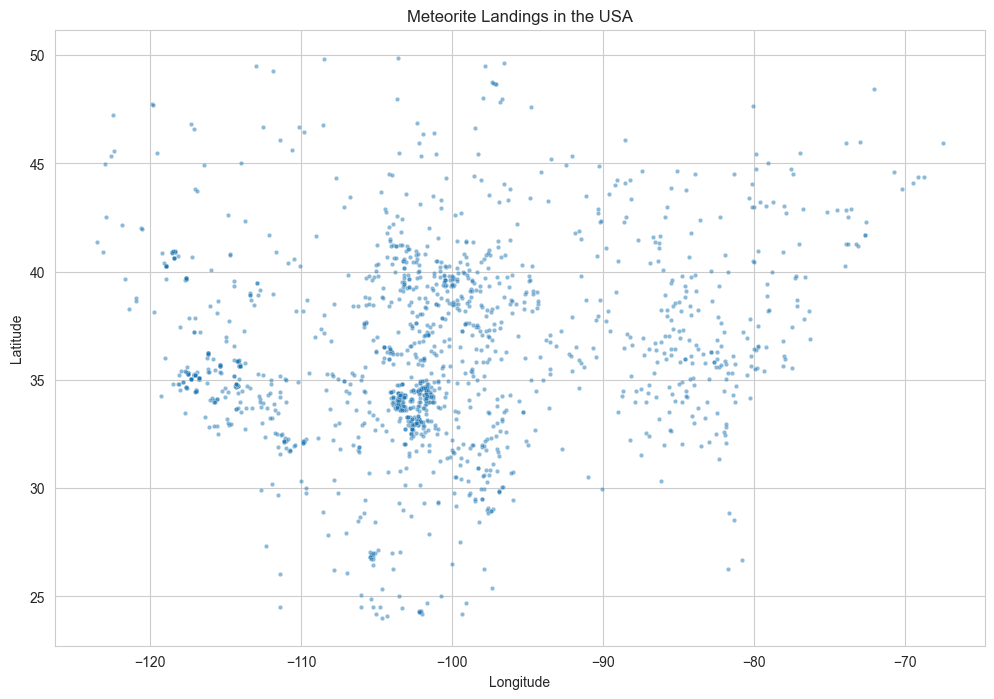

In [20]:
# Approximate latitude and longitude ranges for the USA
min_lat = 24.0  # Approximate minimum latitude
max_lat = 50.0  # Approximate maximum latitude
min_lon = -125.0 # Approximate minimum longitude
max_lon = -67.0  # Approximate maximum longitude

# Filter the DataFrame for USA locations
df_usa = df[(df['reclat'] >= min_lat) & (df['reclat'] <= max_lat) &
            (df['reclong'] >= min_lon) & (df['reclong'] <= max_lon)]

# Create the scatterplot
plt.figure(figsize=(12, 8))
sns.scatterplot(x='reclong', y='reclat', data=df_usa, alpha=0.5, s=10)
plt.title('Meteorite Landings in the USA')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

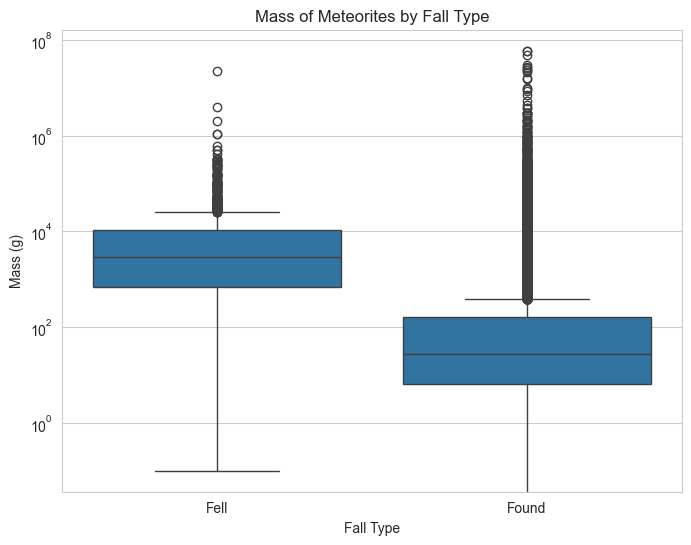

In [21]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='fall', y='mass', data=df)
plt.title('Mass of Meteorites by Fall Type')
plt.xlabel('Fall Type')
plt.ylabel('Mass (g)')
plt.yscale('log') #use log scale.
plt.show()

In [22]:
# Load the meteorite landings dataset
data = pd.read_csv("Meteorite_landings/meteorite-landings.csv")

# Display the first few rows
data.head()


,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"


In [23]:
# Define features and target
features = ['mass', 'reclat', 'reclong']
target = 'recclass'

# Subset the data
data_subset = data[features + [target]]

# Drop rows with missing values
clean_data = data_subset.dropna()

# Check cleaned data shape
clean_data.shape


(38282, 4)

In [24]:
# Get the top 20 most common recclass categories
top_classes = clean_data[target].value_counts().nlargest(20).index

# Filter dataset to only include these classes
limited_data = clean_data[clean_data[target].isin(top_classes)]

# Display class counts after filtering
limited_data[target].value_counts()


recclass
L6             7537
H5             6269
H6             3903
H4             3892
L5             3296
LL5            2202
LL6            1660
L4              972
H4/5            395
CM2             330
H3              314
CO3             308
Iron, IIIAB     276
L3              270
LL              223
Ureilite        214
E3              205
LL4             198
CV3             185
Howardite       179
Name: count, dtype: int64

In [25]:
# Separate features and target
X = limited_data[features]
y = limited_data[target]

# Apply standard scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Preview the scaled feature array
X_scaled[:5]


array([[-0.01567166,  2.07974915, -0.73651977],
       [-0.01375729,  2.19976951, -0.68483315],
       [-0.01359297,  0.21693564, -1.62121186],
       [ 0.0664325 ,  1.93420825, -0.80460486],
       [-0.01129244,  0.25170281, -1.62474063]])

In [27]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)


In [28]:
# Initialize Logistic Regression model for multi-class classification
model = LogisticRegression(
    multi_class='multinomial',    # Multinomial logistic regression for multi-class problems
    solver='lbfgs',               # Efficient solver for small to medium datasets
    max_iter=500                  # Allow enough iterations for convergence
)

# Train the model using training data
model.fit(X_train, y_train)



LogisticRegression(max_iter=500, multi_class='multinomial')

In [29]:
# Predict the target on the test set
y_pred = model.predict(X_test)

# Generate classification report
report = classification_report(y_test, y_pred)

# Print report
print(report)


              precision    recall  f1-score   support

         CM2       0.00      0.00      0.00        99
         CO3       0.00      0.00      0.00        92
         CV3       0.00      0.00      0.00        55
          E3       0.00      0.00      0.00        61
          H3       0.00      0.00      0.00        94
          H4       0.07      0.03      0.04      1168
        H4/5       0.00      0.00      0.00       119
          H5       0.00      0.00      0.00      1881
          H6       0.00      0.00      0.00      1171
   Howardite       0.00      0.00      0.00        54
 Iron, IIIAB       0.38      0.04      0.07        83
          L3       0.00      0.00      0.00        81
          L4       0.00      0.00      0.00       292
          L5       0.00      0.00      0.00       989
          L6       0.23      0.95      0.37      2261
          LL       0.00      0.00      0.00        67
         LL4       0.00      0.00      0.00        59
         LL5       0.00    

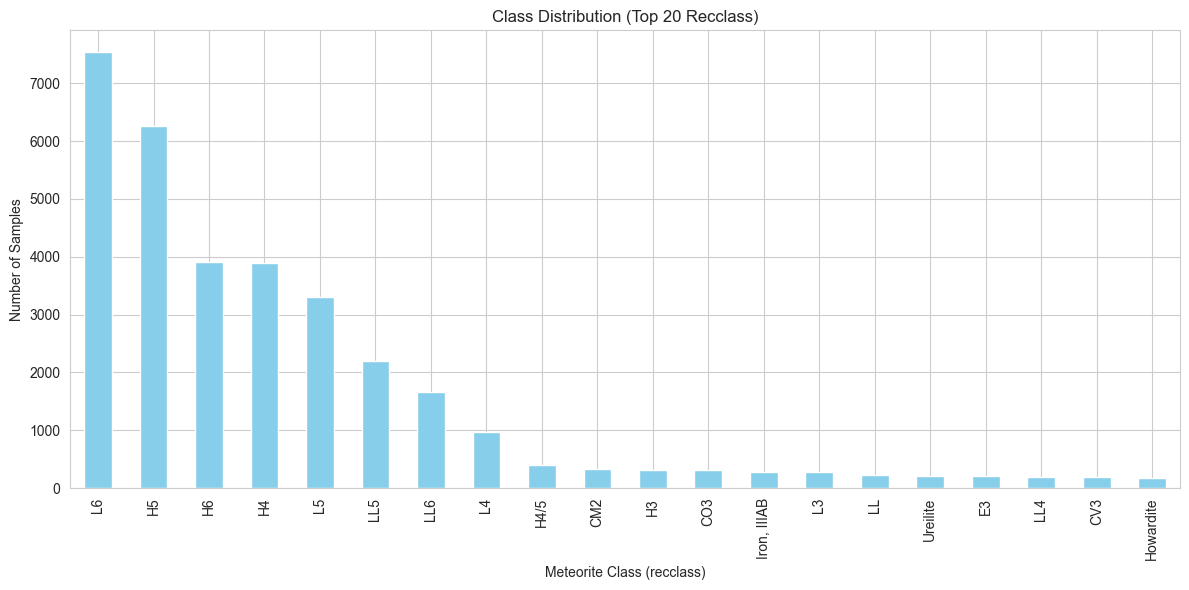

In [30]:
# Plot class distribution
plt.figure(figsize=(12, 6))
limited_data[target].value_counts().plot(kind='bar', color='skyblue')
plt.title("Class Distribution (Top 20 Recclass)")
plt.xlabel("Meteorite Class (recclass)")
plt.ylabel("Number of Samples")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


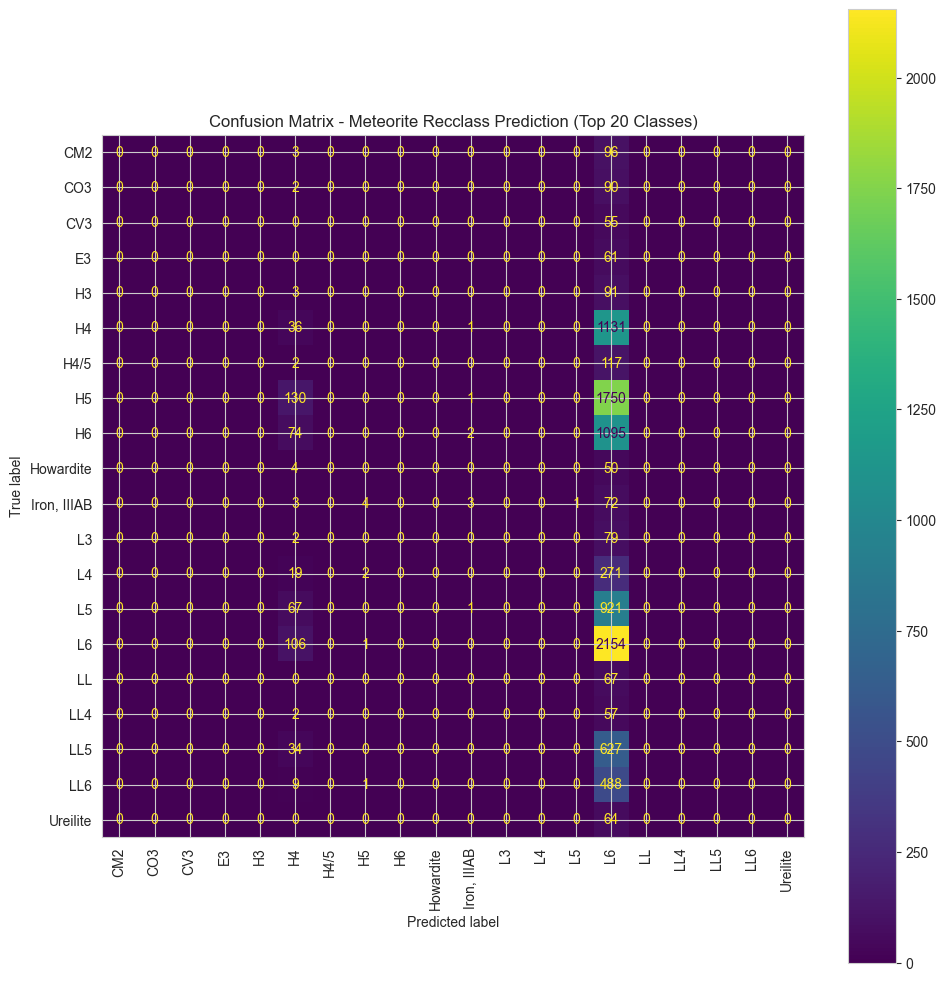

In [33]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

# Display the confusion matrix as a heatmap
fig, ax = plt.subplots(figsize=(10, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(ax=ax, xticks_rotation='vertical')
plt.title("Confusion Matrix - Meteorite Recclass Prediction (Top 20 Classes)")
plt.tight_layout()
plt.show()
